<a href="https://colab.research.google.com/github/VitorFRodrigues/Polo_Tech_Americanas/blob/main/Polo_Tech/Modulo_05/Aula02_exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/VitorFRodrigues/Polo_Tech_Americanas/main/Polo_Tech/Modulo_05/Datasets/insurance.csv'

In [3]:
insurance = pd.read_csv(url)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
sexo = {
    'female': 1,
    'male': 0,
}
fumante = {
    'no': 0,
    'yes': 1
}

In [5]:
insurance['sex'] = insurance['sex'].map(sexo)
insurance['smoker'] = insurance['smoker'].map(fumante)

In [6]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [7]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
regiao = {
    'southwest': 1,
    'southeast': 2,
    'northwest': 3,
    'northeast': 4
}

In [9]:
insurance['region'] = insurance['region'].map(regiao)

In [10]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [11]:
insurance.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

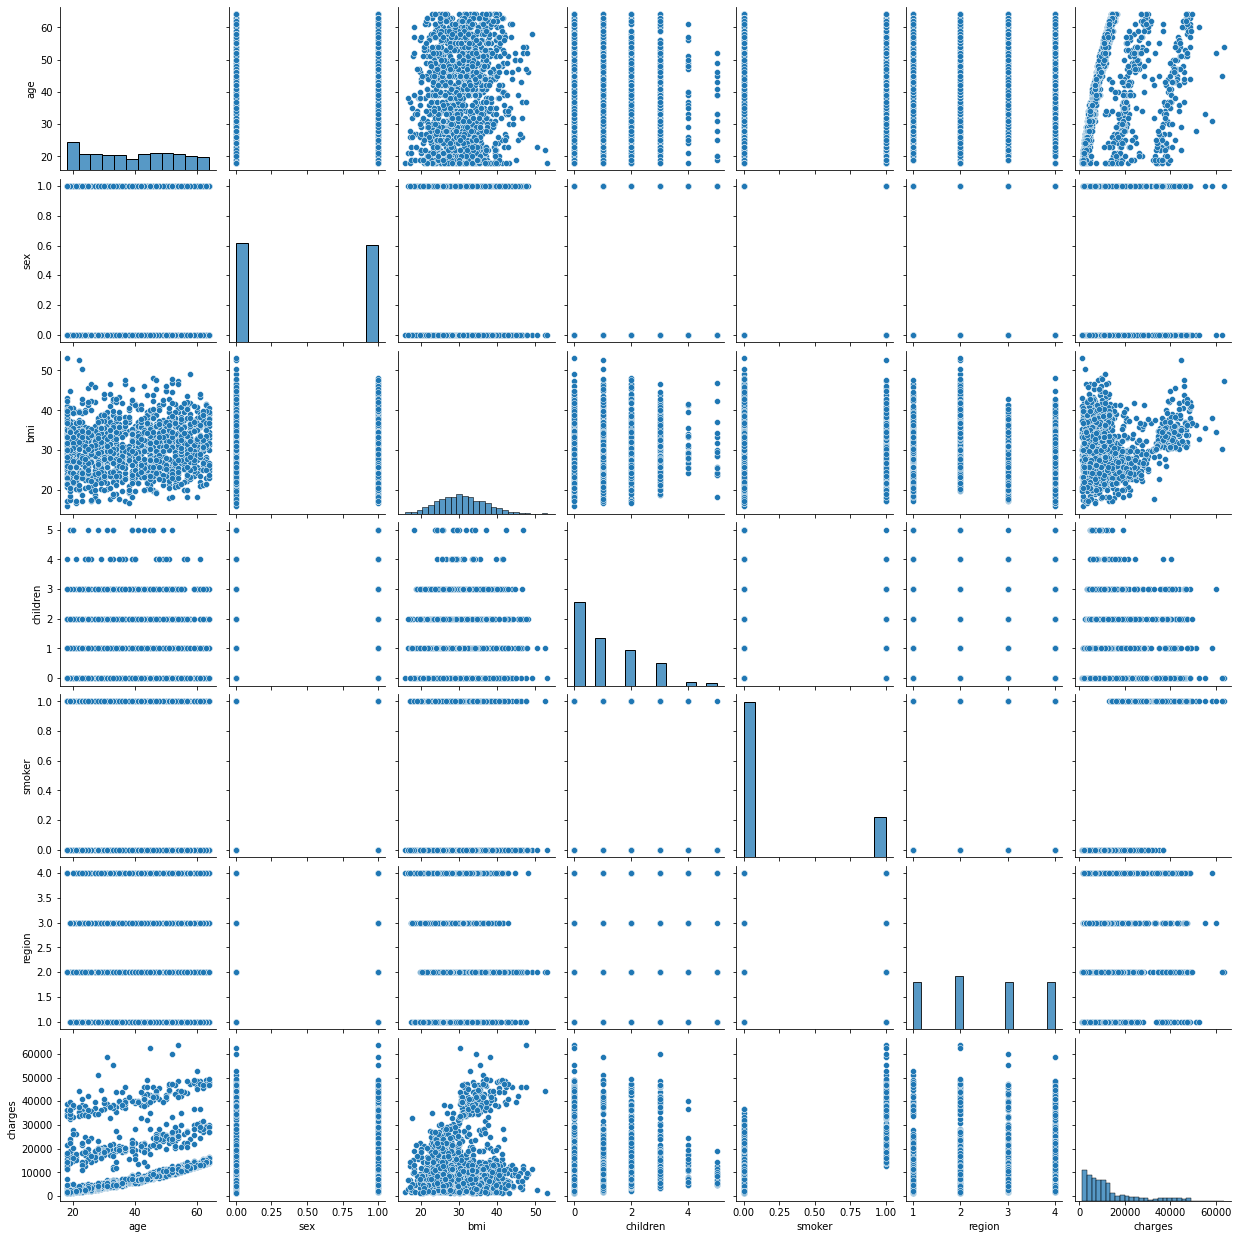

In [12]:
sns.pairplot(insurance)

In [13]:
insurance.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


In [14]:
modelo = LinearRegression()

# Considerando correlação acima de 5% em relação ao Preço
X = insurance[['age', 'bmi', 'smoker']]
Y = insurance['charges']
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, train_size=0.75, random_state= 42)

modelo.fit(x_treino, y_treino)

LinearRegression()

In [15]:
y_pred = modelo.predict(x_teste)

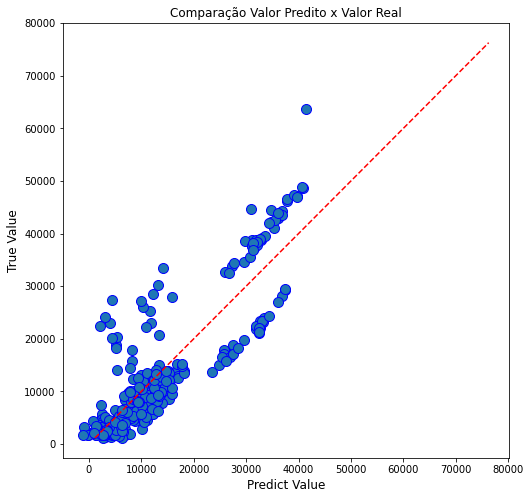

In [16]:
## define tamanho da figura
fig = plt.figure(figsize=(8,8))

# Configurações do plot
l = plt.plot(y_pred, y_teste, 'bo') # Define os eixos x e y. O argumento 'bo' indica que queremos que os elementos
                                    # apareçam como circulos azuis
plt.setp(l, markersize=10)          # Aqui definimos o tamanho dos circulos
plt.setp(l, markerfacecolor='C0')   # Aqui definimos a cor do contorno

## Titulo e eixos
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

## Aqui definimos a equação da reta de aproximação e adicionamos ela no plot
xl = np.arange(min(y_teste), 1.2*max(y_teste),(max(y_teste)-min(y_teste))/10)
yl = xl
plt.plot(xl, yl, 'r--')

## Exibição
plt.show()

In [17]:
r2_score(y_teste, y_pred)

0.7622843807642005

In [18]:
mean_absolute_error(y_teste, y_pred) # menos sensivel a variâcia (outliers)

4301.327214279141

In [19]:
mean_squared_error(y_teste, y_pred, squared=False) # muito sensivel a variâcia (outliers)

5989.088470883204